### Import Packages

In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle

### Load image list

In [2]:
IMG_DIR = "img_test"

images_in_dir = os.listdir(IMG_DIR)

# add paths
image_path_list = []
for i in images_in_dir:
    image_path_list.append(os.path.join(IMG_DIR, i))

### Inception V3 Confusion matrix

#### Load results from pickles

In [3]:
pickle_dir = "inception_pickled"
ground_truth_file = os.path.join(pickle_dir, "ground_truth.pickle")
prediction_file = os.path.join(pickle_dir, "inception_predition.pickle") # yeah file name typo :(

In [4]:
def load_from_pickle(pickle_file):
    file_handle = open(pickle_file, "rb")
    data_pickled = pickle.load(file_handle)
    
    file_handle.close()
    return data_pickled

In [5]:
ground_truth = load_from_pickle(ground_truth_file)
predictions = load_from_pickle(prediction_file)

#### Arrays for true and predicted values of confusion matrix

Some files may not be inferrable yet exist in the dir. So we need to create an acceptable file list and pickle it.

In [6]:
y_true = []
y_pred = []
ac_file_list = []

# load the arrays
for image_path in image_path_list:
    try:
        y_true.append(ground_truth[image_path])
        y_pred.append(predictions[image_path])
        ac_file_list.append(image_path)
    except KeyError as e:
        pass


In [7]:
len(ac_file_list)

541

So the test image set has **552** files

#### Confusion Matrix

In [8]:
conf_mat = confusion_matrix(y_true, y_pred)

In [9]:
print(conf_mat)
print(conf_mat.shape)

[[  1   0   1   0   0   0   0   0]
 [  0   7   0   2   0   1   0   0]
 [  0   0   1   0   0   0   0   0]
 [  0   0   0   7   0   0   2   0]
 [  0   0   0   4  77   0   0   0]
 [  0  22   0  31   2 269   0   0]
 [  0   0   0   0   0   0   1   0]
 [  1   3   0  12  34   0  15  48]]
(8, 8)


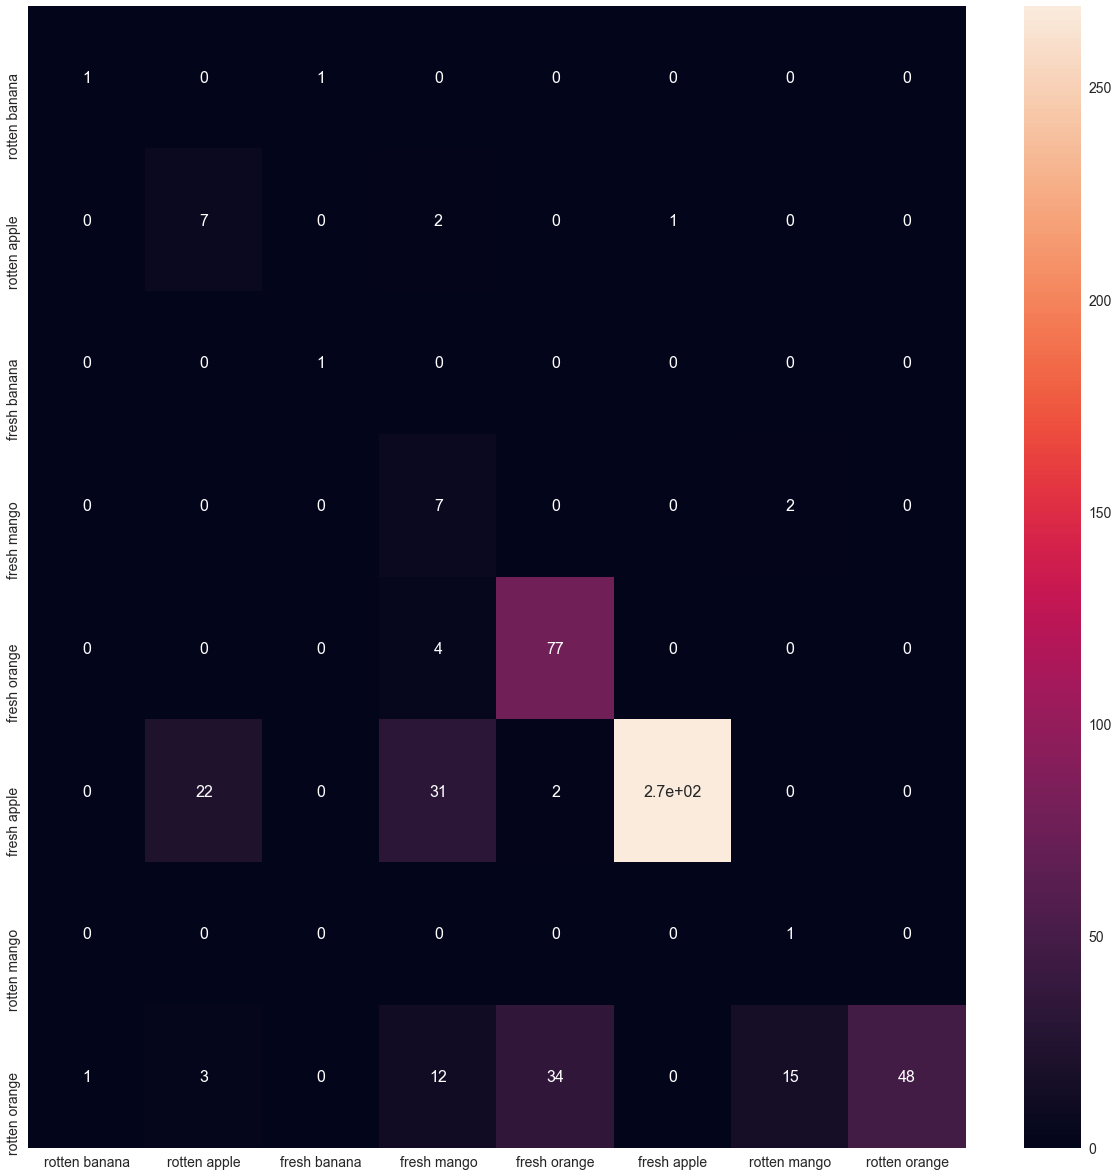

In [10]:
#labels = [ i for i in range(8) ]
labels = [ "rotten banana", "rotten apple", "fresh banana", "fresh mango", "fresh orange", "fresh apple",
         "rotten mango", "rotten orange"]

df_cm = pd.DataFrame(conf_mat, index = labels,
                columns = labels)
plt.figure(figsize = (21,21))
# sn.heatmap(df_cm, annot=True)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})

plt.show()

In [11]:
accuracy = accuracy_score(y_true, y_pred)
print(accuracy)

0.759704251386


### VGG16 Scratch Confusion Matrix

#### Load data from pickles

In [12]:
pickle_root = "vgg16_scratch_pickle"
gt = load_from_pickle(os.path.join(pickle_root, "vgg16_s_ground.pickle"))
pred = load_from_pickle(os.path.join(pickle_root, "vgg16_s_err.pickle"))

#### Confusion Metrics

In [13]:
y_true = []
y_pred = []

# load the arrays
keyList = list(gt.keys())
for key in keyList:
    # excluding png images for now
    if key in gt and key in pred:
        y_true.append(gt[key])
        y_pred.append(pred[key])
        

In [14]:

conf_mat = confusion_matrix(y_true, y_pred)
print(conf_mat)

[[412   2]
 [133   4]]


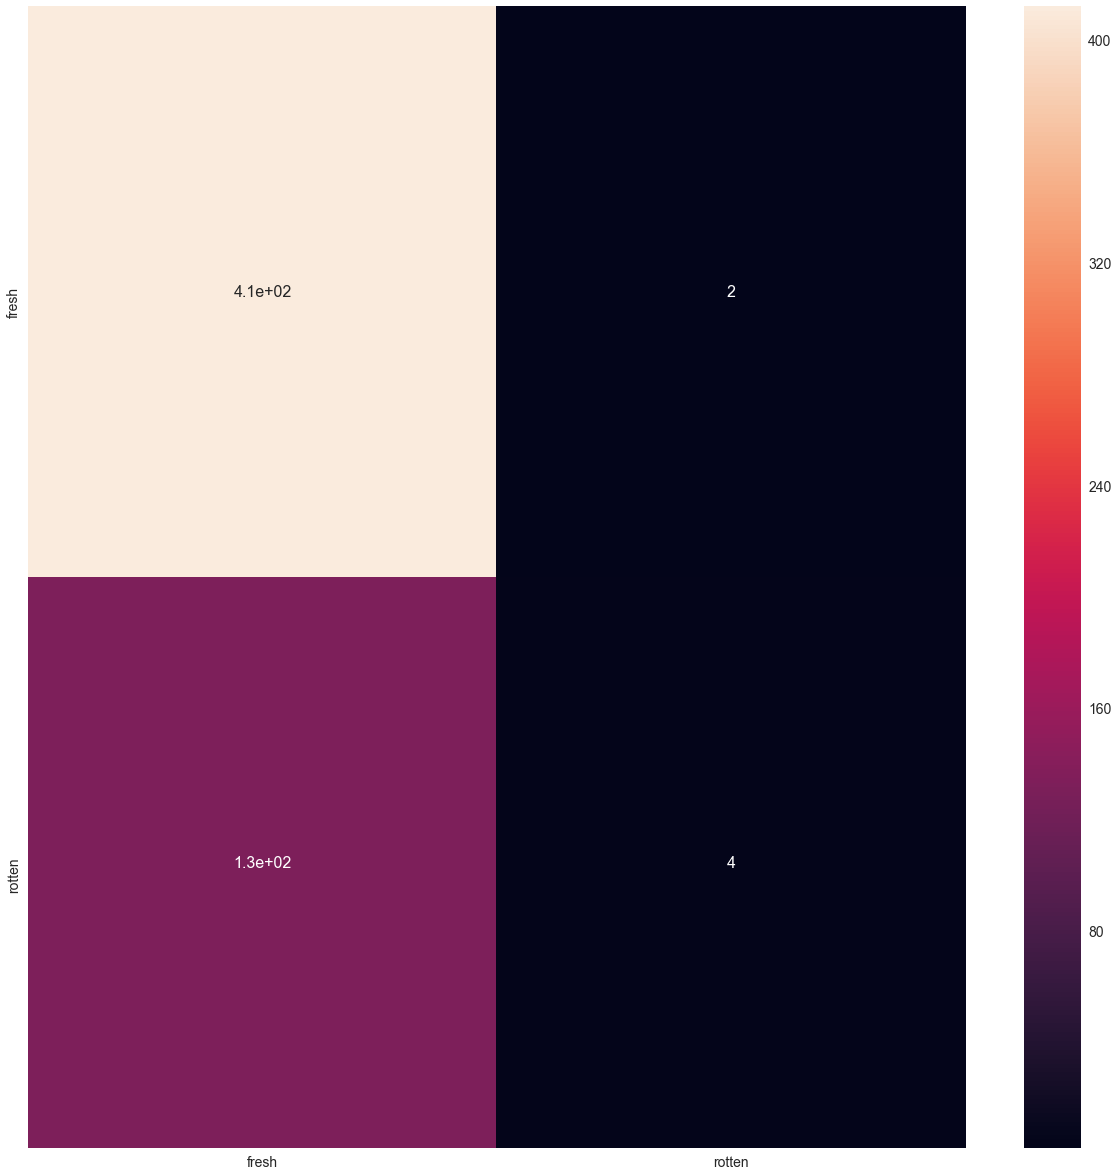

In [15]:
labels = [ "fresh", "rotten" ]

df_cm = pd.DataFrame(conf_mat, index = labels,
                columns = labels)
plt.figure(figsize = (21,21))
# sn.heatmap(df_cm, annot=True)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})

plt.show()

In [16]:
accuracy = accuracy_score(y_true, y_pred)
print(accuracy)

0.75499092559


In [18]:
x = [
 [  1,   0,   1,   0,   0,   0,   0,   0],
 [  0,   9,   0,   2,   0,   1,   0,   0],
 [  0,   0,   1,   0,   0,   0,   0,   0],
 [  0,   0,   0,   7,   0,   0,   2,   0],
 [  0,   0,   0 ,  4,  77,   0,   0,   0],
 [  0,  7,   0,  31,   2, 282,   0,   0],
 [  0,   0,   0,   0,   0,   0,   1,   0],
 [  1,   3,   0,  12,  34,   0,  15,  48]
]

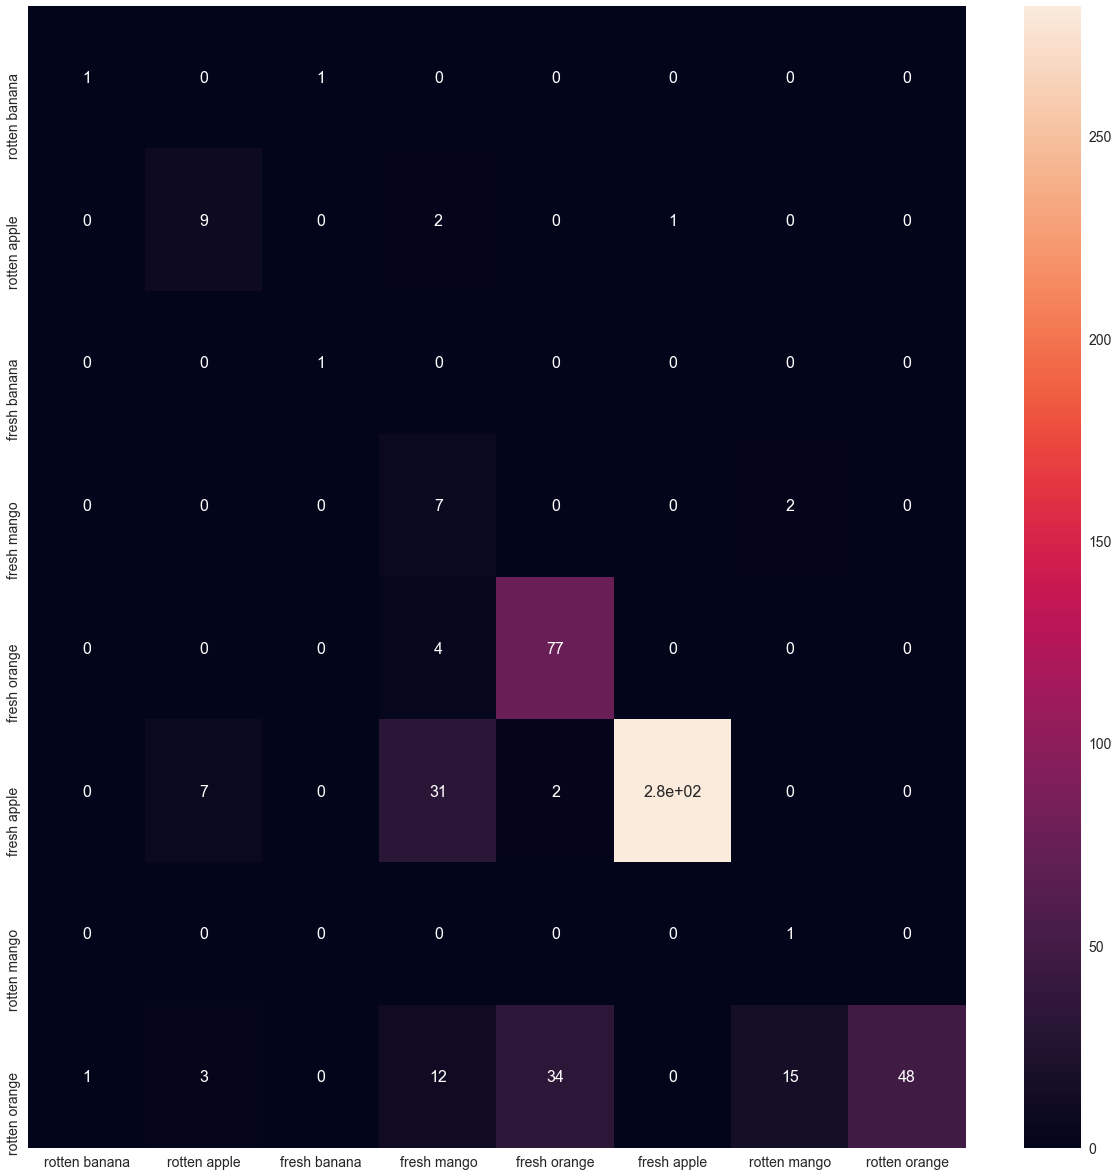

In [19]:
#labels = [ i for i in range(8) ]
labels = [ "rotten banana", "rotten apple", "fresh banana", "fresh mango", "fresh orange", "fresh apple",
         "rotten mango", "rotten orange"]

df_cm = pd.DataFrame(x, index = labels,
                columns = labels)
plt.figure(figsize = (21,21))
# sn.heatmap(df_cm, annot=True)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})

plt.show()